In [1]:
import numpy as np
from math import exp,log,sqrt,pi,tanh
import matplotlib.pyplot as plt
from numba import cuda

## Exercise 1

Create a vectorized version of log and exp math function for 1D array A = [2, 5, 10, 3, 8]

Results should be: 
+ [0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
+ [7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]

In [2]:
#Answer
from numba import vectorize, float64

@vectorize([float64(float64)])
def v_log(x):
    return log(x)

@vectorize([float64(float64)])
def v_exp(x):
    return exp(x)

A = [2, 5, 10, 3, 8]

print(v_log(A))
print(v_exp(A))

[0.69314718 1.60943791 2.30258509 1.09861229 2.07944154]
[7.38905610e+00 1.48413159e+02 2.20264658e+04 2.00855369e+01
 2.98095799e+03]


## Exerice 2
Compute the value of a Gaussian probability density function at $x$ with $mean = 1$, $\sigma = 1$, lower and upper bound in $(-3, 3)$ and $size = 100000$

[0.00013383 0.00013386 0.00013389 ... 0.05400393 0.05399745 0.05399097]


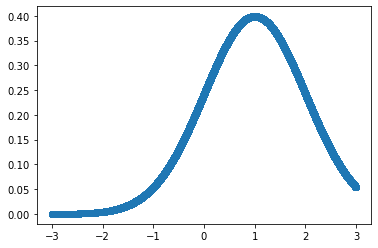

In [3]:
#Answer

x = np.linspace(-3, 3, num=100000, endpoint=True)

@vectorize([float64(float64)])
def pdf(x):
    sigma = 1.
    mean  = 1.
    return 1/sqrt(2*pi*sigma**2) * exp(-(x-mean)**2 /(2*sigma**2))

p = pdf(x)

print(p)
plt.scatter(x,p)
plt.show()

## Exercise 3

Create a "zero suppression" function. A common operation when working with waveforms is to force all samples values below a certain absolute magnitude to be zero, as a way to eliminate low amplitude noise. 
Plot the data before and after the application of the zero_suppress function.

$thresold = 15$

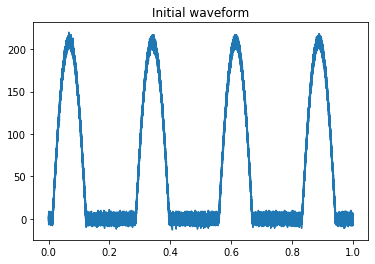

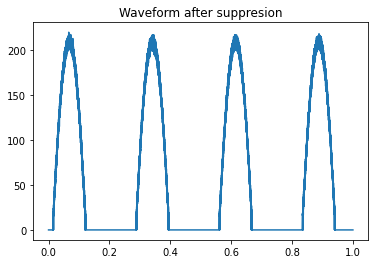

In [4]:
#Answer
%matplotlib inline
from matplotlib import pyplot as plt

threshold = 15
n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
data = ((pulses * 300) + noise).astype(np.int16)

@vectorize([float64(float64)])
def zero_suppression(x):
    if x < threshold:
        x=0
    return x

data_s = zero_suppression(data)
x = np.linspace(0, 1, num=len(data), endpoint=True)

plt.plot(x,data)
plt.title('Initial waveform')
plt.show()

plt.plot(x,data_s)
plt.title('Waveform after suppresion')
plt.show()

# I faced huge problems with CUDA in my lapton which didn't allow me to perform the following exercises.

## Exercise 4

Calculate the Sigmoid kernel between the matrix X and Y defined as below. The Sigmoid kernel is defined as:

$k(x,y) = \tanh(\alpha x^T y + c) $

In [5]:
#Answer
#https://nyu-cds.github.io/python-numba/05-cuda/

X = np.random.rand(3,3)
Y = np.random.rand(3,3)


## Exercise 5

Create a kernel function similar to the ```double_kernel``` see during the lecture and create a new function that takes a 3 dimensional matrix as input calculating the $cos$ for each element and then returns the result. The shape of the matrix must be $256X256X256$. The matrix can be randomly generated

## Exercise 6

Create a matrix multiplication kernel function, called ```matmul``` that takes as input two 2D matrices:
+ A of shape $24x12$
+ B of shape $12x22$
and that computes the multiplication and put the results into a third matrix C of shape $24x12$

A and B must be randomly generated and only int values are allowed.


In [6]:
from __future__ import division
from numba import cuda
import numpy
import math

# complete the code
@cuda.jit
def matmul(A, B, C):
    """Perform matrix multiplication of C = A * B
    """
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp

# Initialize the data arrays
A = 
B = 

# Configure the blocks
threadsperblock = 
blockspergrid_x = 
blockspergrid_y = 
blockspergrid = 



SyntaxError: invalid syntax (<ipython-input-6-f8f42b372a71>, line 19)